In [ ]:
# Step 1: Data Understanding
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('student_performance.csv')

In [ ]:
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nDataset description:")
print(df.describe())


First 5 rows of the dataset:
   Hours_Studied  Previous_Scores Extracurricular  Sleep_Hours  \
0              2               40              No            6   
1              5               60             Yes            7   
2              8               85              No            8   
3              1               35              No            5   
4              6               75             Yes            7   

  Internet_Access  Attendance Performance  
0             Yes          70         Low  
1             Yes          80      Medium  
2             Yes          90        High  
3              No          60         Low  
4             Yes          85        High  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Hours_Studied    20 non-null     int64 
 1   Previous_Scores  20 non-null     int64 
 2   Extracur

In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Hours_Studied      0
Previous_Scores    0
Extracurricular    0
Sleep_Hours        0
Internet_Access    0
Attendance         0
Performance        0
dtype: int64


In [ ]:
#step 2

In [ ]:
df['Extracurricular'] = df['Extracurricular'].map({'Yes': 1, 'No': 0})
df['Internet_Access'] = df['Internet_Access'].map({'Yes': 1, 'No': 0})


In [ ]:
X = df.drop('Performance', axis=1)
y = df['Performance']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")



Training set size: (14, 6)
Test set size: (6, 6)


In [ ]:
#step 3

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
print("\nDecision Tree Rules:")
print("The tree has {} nodes.".format(dt_classifier.tree_.node_count))



Decision Tree Rules:
The tree has 5 nodes.


In [ ]:
y_pred = dt_classifier.predict(X_test)


In [ ]:
df

,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance,Performance
0,2,40,0,6,1,70,Low
1,5,60,1,7,1,80,Medium
2,8,85,0,8,1,90,High
3,1,35,0,5,0,60,Low
4,6,75,1,7,1,85,High
5,4,55,1,6,1,78,Medium
6,3,45,0,7,0,72,Low
7,7,80,1,8,1,95,High
8,5,65,0,6,1,82,Medium
9,2,50,1,5,0,68,Low


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.50

Confusion Matrix:
[[1 0 0]
 [0 0 1]
 [2 0 2]]

Classification Report:
              precision    recall  f1-score   support

        High       0.33      1.00      0.50         1
         Low       0.00      0.00      0.00         1
      Medium       0.67      0.50      0.57         4

    accuracy                           0.50         6
   macro avg       0.33      0.50      0.36         6
weighted avg       0.50      0.50      0.46         6



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Step 5

In [ ]:
print("\n=== Model Tuning Results ===")

# Try different max_depth values
for max_depth in [2, 3, 4, 5, None]:
    for criterion in ['gini', 'entropy']:
        dt_tuned = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=42)
        dt_tuned.fit(X_train, y_train)
        y_pred_tuned = dt_tuned.predict(X_test)
        accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
        print(f"max_depth={max_depth}, criterion={criterion}: Accuracy = {accuracy_tuned:.3f}")


=== Model Tuning Results ===
max_depth=2, criterion=gini: Accuracy = 0.500
max_depth=2, criterion=entropy: Accuracy = 0.500
max_depth=3, criterion=gini: Accuracy = 0.500
max_depth=3, criterion=entropy: Accuracy = 0.500
max_depth=4, criterion=gini: Accuracy = 0.500
max_depth=4, criterion=entropy: Accuracy = 0.500
max_depth=5, criterion=gini: Accuracy = 0.500
max_depth=5, criterion=entropy: Accuracy = 0.500
max_depth=None, criterion=gini: Accuracy = 0.500
max_depth=None, criterion=entropy: Accuracy = 0.500


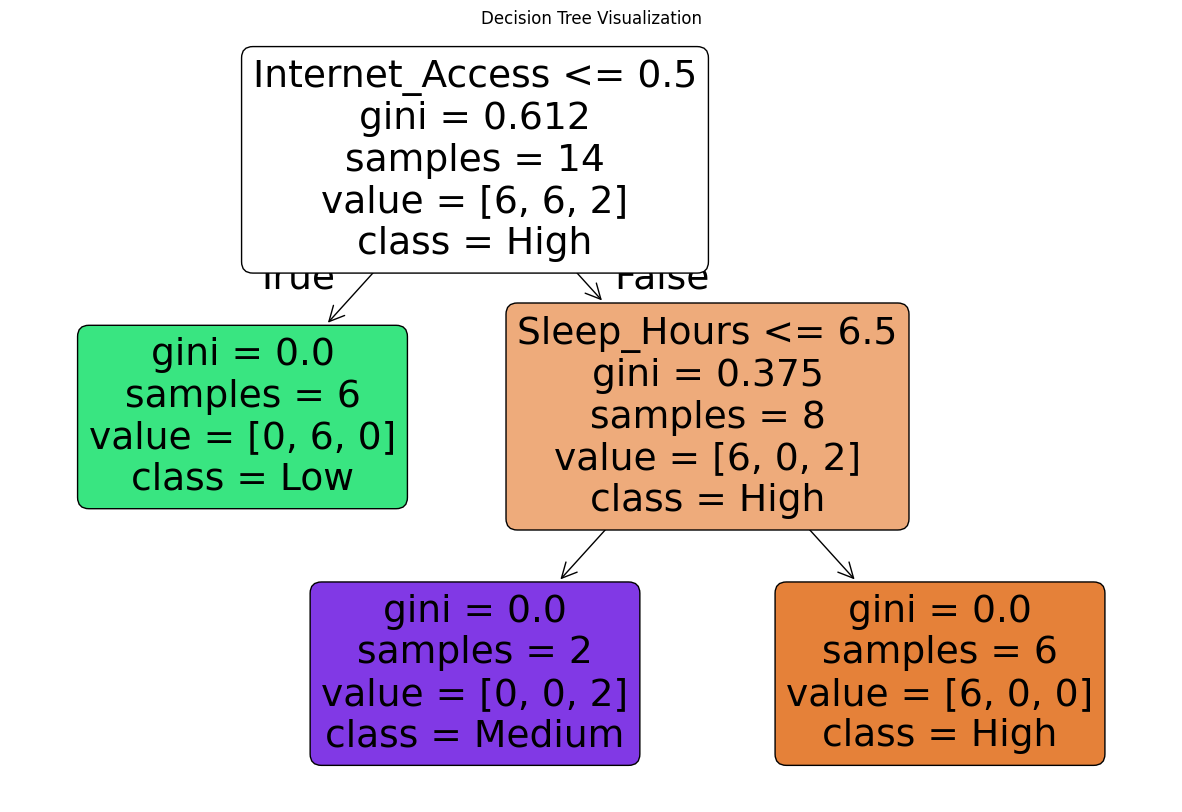

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier,
          feature_names=X.columns,
          class_names=dt_classifier.classes_,
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()



In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
           feature  importance
4  Internet_Access        0.65
3      Sleep_Hours        0.35
1  Previous_Scores        0.00
0    Hours_Studied        0.00
2  Extracurricular        0.00
5       Attendance        0.00


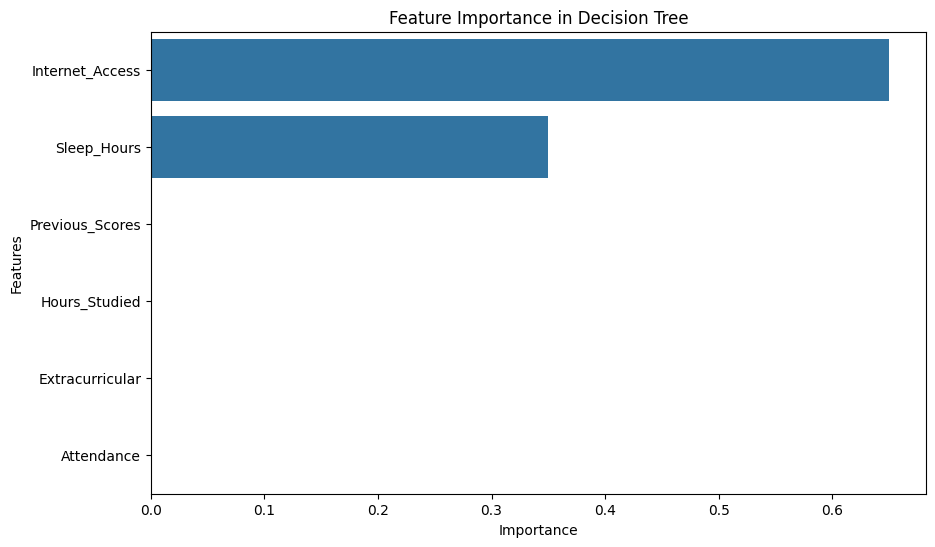

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
Step 6

In [ ]:
print("\n" + "="*50)
print("INSIGHTS & CONCLUSION")
print("="*50)

# 13. Which features influence student performance the most?
print("\n13. Most influential features on student performance:")
for i, row in feature_importance.iterrows():
    print(f"   {row['feature']}: {row['importance']:.3f}")

# 14. Teacher insights
print("\n14. Teacher recommendations based on insights:")
print("   - Focus on improving Previous_Scores through targeted remediation")
print("   - Encourage consistent Attendance through engagement strategies")
print("   - Ensure students get adequate Sleep_Hours (7-8 hours recommended)")
print("   - Promote optimal Hours_Studied (5-8 hours daily)")
print("   - Provide Internet_Access resources for all students")
print("   - Encourage Extracurricular activities for balanced development")


INSIGHTS & CONCLUSION

13. Most influential features on student performance:
   Internet_Access: 0.650
   Sleep_Hours: 0.350
   Previous_Scores: 0.000
   Hours_Studied: 0.000
   Extracurricular: 0.000
   Attendance: 0.000

14. Teacher recommendations based on insights:
   - Focus on improving Previous_Scores through targeted remediation
   - Encourage consistent Attendance through engagement strategies
   - Ensure students get adequate Sleep_Hours (7-8 hours recommended)
   - Promote optimal Hours_Studied (5-8 hours daily)
   - Provide Internet_Access resources for all students
   - Encourage Extracurricular activities for balanced development
